In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
calcium = pd.read_csv('2023_03_31_undirected_song_joint_spkfn.csv')
calcium.head()

,frame_index,neuron_4,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,...,neuron_44,neuron_45,neuron_46,neuron_47,neuron_48,neuron_49,neuron_50,neuron_51,neuron_52,stamp_msSinceEpoch
0,0,0.000000,0.060909,0.004638,0.003604,0.015218,0.004655,0.010936,0.006687,0.000000,...,0.003801,0.000553,0.040030,0.010343,0.000000,0.000162,0.005307,0.000000,0.006271,1680271295171
1,2,0.036173,0.164813,0.007616,0.000000,0.018125,0.007724,0.011625,0.015922,0.014464,...,0.007462,0.041431,0.338536,0.038388,0.046639,0.002800,0.099485,0.043968,0.023744,1680271295331
2,4,0.050402,0.193675,0.009401,0.075075,0.019208,0.009636,0.011593,0.021142,0.027613,...,0.009871,0.058384,0.478910,0.052167,0.101694,0.004221,0.124260,0.062551,0.032249,1680271295441
3,6,0.052716,0.186280,0.010319,0.131992,0.019061,0.010691,0.011100,0.023572,0.035534,...,0.011331,0.062189,0.470203,0.056978,0.118282,0.004963,0.123059,0.071430,0.035104,1680271295576
4,8,0.049051,0.163548,0.010619,0.160449,0.018120,0.011122,0.010332,0.024108,0.039662,...,0.012078,0.059144,0.413882,0.056370,0.116308,0.016796,0.113208,0.069873,0.034545,1680271295710


Load in Data of annotated notes and convert to ms

In [3]:
notes = pd.read_csv('2023_03_31_7_03_30_annotated.txt', sep='\t', 
                                                        header=None, 
                                                        names=['start', 'end', 'note'])
start_Ms = 1680271410910
# Convert timing in s to ms from start_Ms
notes['start'] = notes['start'] * 1000 + start_Ms
notes['end'] = notes['end'] * 1000 + start_Ms
notes.head()

,start,end,note
0,1.680271e+12,1.680271e+12,i
1,1.680271e+12,1.680271e+12,i
2,1.680271e+12,1.680271e+12,x
3,1.680271e+12,1.680271e+12,y
4,1.680271e+12,1.680271e+12,x


Create Transition matrix between syllables

C:\Users\nriveira\AppData\Local\Temp\ipykernel_19892\2962725200.py:15: RuntimeWarning: invalid value encountered in divide
  transitions[i,:] /= (notes['note']==states[i]).sum()


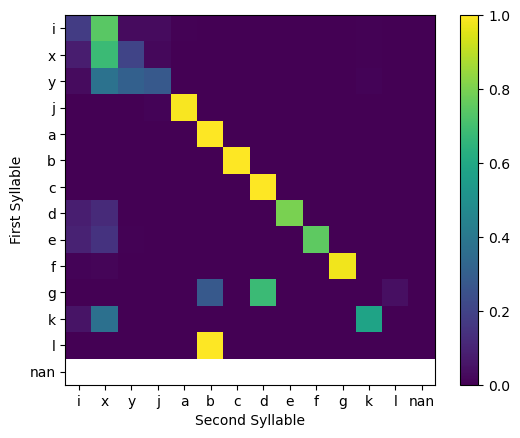

In [4]:
# Calculate transition probabilities by making a matrix of all possible transitions
# and then counting the number of times each transition occurs
states = notes['note'].unique()
n_states = len(states)
transitions = np.zeros((n_states, n_states))

# Count the number of times each transition occurs
for i in range(len(notes)-1):
    start = notes['note'][i]
    end = notes['note'][i+1]
    transitions[np.where(states==start), np.where(states==end)] += 1

# Normalize the transition matrix by frequency of each state
for i in range(n_states):
    transitions[i,:] /= (notes['note']==states[i]).sum()

# Plot the transition matrix
fig, ax = plt.subplots()
plt.imshow(transitions)

plt.xticks(range(n_states), states)
plt.yticks(range(n_states), states)
ax.set(xlabel='Second Syllable', ylabel='First Syllable')
plt.colorbar()

Look at Calcium imaging traces

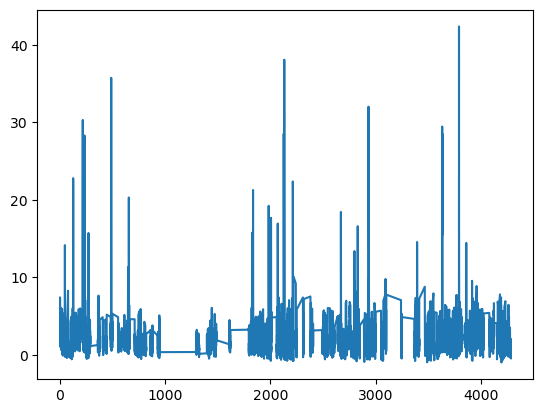

In [5]:
# Plot change in F as a function of total F for neuron 7
neuron = 'neuron_7'
F = np.array(calcium[neuron])
f0 = np.percentile(F, 5)
F = (F - f0) / f0
time_ms = (calcium['stamp_msSinceEpoch'] - calcium['stamp_msSinceEpoch'].min())/1000
plt.plot(time_ms, F)